<a href="https://colab.research.google.com/github/ShashankAlagawadi/PredictiveMaintenance/blob/main/Algorithms_1K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.818
              precision    recall  f1-score   support

           1       0.73      0.77      0.75       176
           2       0.89      0.82      0.85       160
           3       0.86      0.87      0.86       164

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



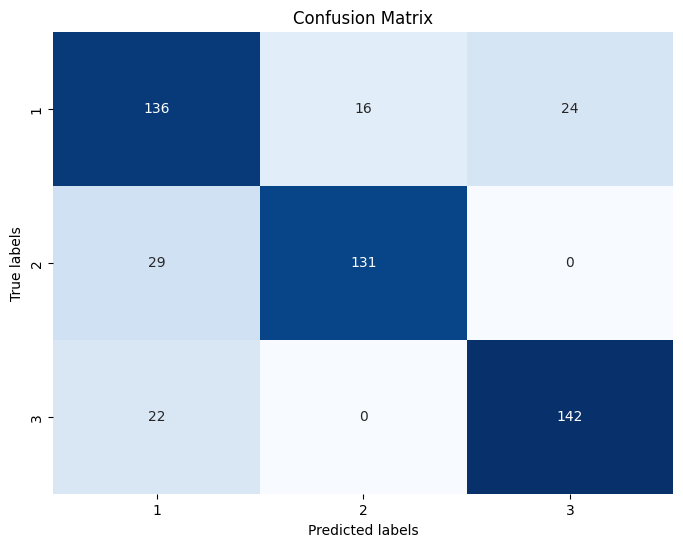

Number of Trees: 1 | Accuracy: 0.79
Number of Trees: 2 | Accuracy: 0.798
Number of Trees: 3 | Accuracy: 0.796
Number of Trees: 4 | Accuracy: 0.806
Number of Trees: 5 | Accuracy: 0.8
Number of Trees: 6 | Accuracy: 0.802
Number of Trees: 7 | Accuracy: 0.806
Number of Trees: 8 | Accuracy: 0.804
Number of Trees: 9 | Accuracy: 0.806
Number of Trees: 10 | Accuracy: 0.81
Number of Trees: 11 | Accuracy: 0.816
Number of Trees: 12 | Accuracy: 0.814
Number of Trees: 13 | Accuracy: 0.81
Number of Trees: 14 | Accuracy: 0.812
Number of Trees: 15 | Accuracy: 0.812
Number of Trees: 16 | Accuracy: 0.814
Number of Trees: 17 | Accuracy: 0.816
Number of Trees: 18 | Accuracy: 0.814
Number of Trees: 19 | Accuracy: 0.816
Number of Trees: 20 | Accuracy: 0.82
Number of Trees: 21 | Accuracy: 0.82
Number of Trees: 22 | Accuracy: 0.82
Number of Trees: 23 | Accuracy: 0.82
Number of Trees: 24 | Accuracy: 0.826
Number of Trees: 25 | Accuracy: 0.824
Number of Trees: 26 | Accuracy: 0.82
Number of Trees: 27 | Accuracy:

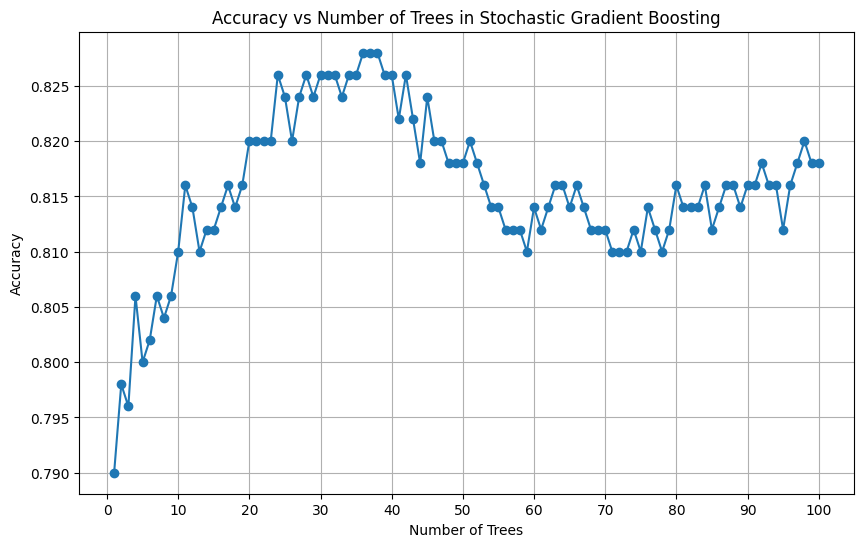

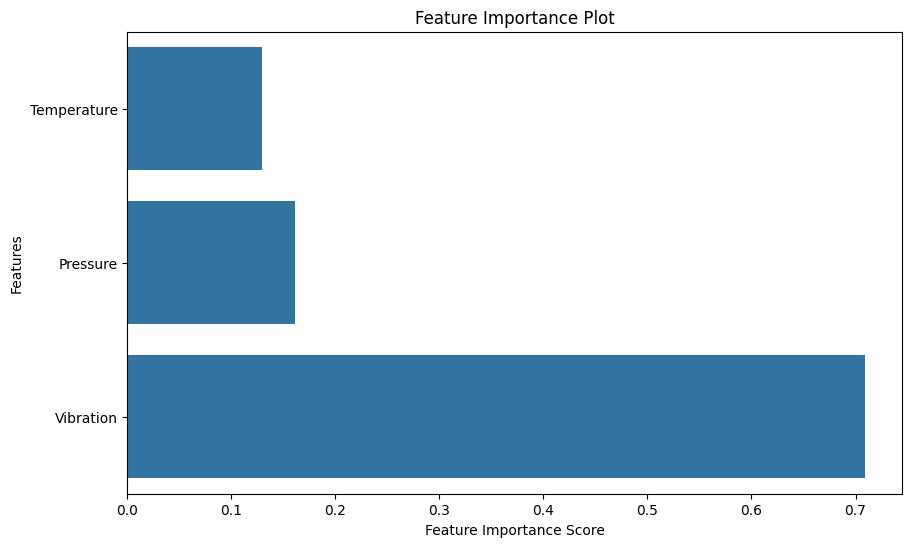

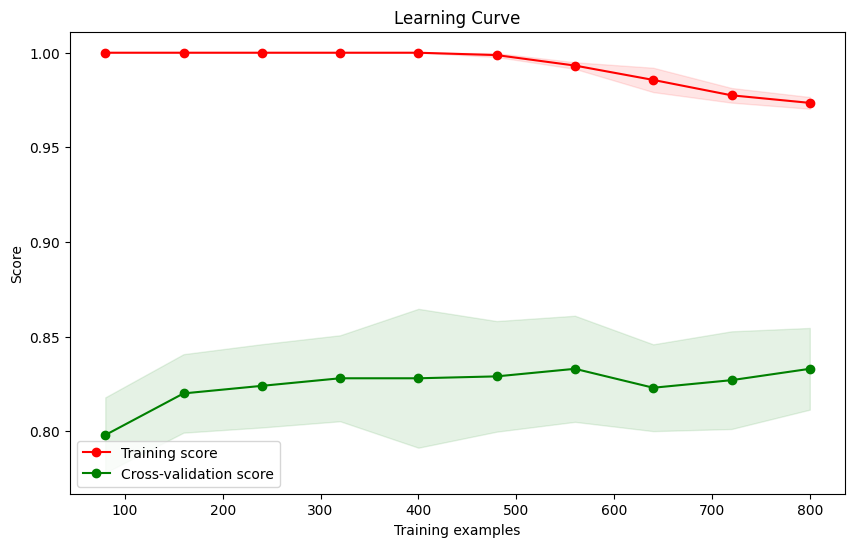

In [ ]:
# Stochastic Gradient Boosting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('/content/PDM1K.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize GradientBoostingClassifier
sgb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
sgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = sgb_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    sgb_classifier = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)
    sgb_classifier.fit(X_train, y_train)
    y_pred = sgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in Stochastic Gradient Boosting')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

# Feature Importance
feature_importances = sgb_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    sgb_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()



In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


Learning rate set to 0.5
0:	learn: 0.7106003	total: 2.81ms	remaining: 278ms
1:	learn: 0.5386948	total: 5.12ms	remaining: 251ms
2:	learn: 0.4461344	total: 8.1ms	remaining: 262ms
3:	learn: 0.3870092	total: 11.6ms	remaining: 278ms
4:	learn: 0.3477312	total: 18ms	remaining: 342ms
5:	learn: 0.3243264	total: 22.7ms	remaining: 356ms
6:	learn: 0.3044254	total: 28.2ms	remaining: 374ms
7:	learn: 0.2944943	total: 33.2ms	remaining: 382ms
8:	learn: 0.2844776	total: 38.6ms	remaining: 390ms
9:	learn: 0.2775545	total: 42.4ms	remaining: 382ms
10:	learn: 0.2701088	total: 48.4ms	remaining: 392ms
11:	learn: 0.2583854	total: 52.5ms	remaining: 385ms
12:	learn: 0.2477866	total: 58.8ms	remaining: 394ms
13:	learn: 0.2386266	total: 63.3ms	remaining: 389ms
14:	learn: 0.2304097	total: 67.3ms	remaining: 381ms
15:	learn: 0.2238352	total: 73.2ms	remaining: 384ms
16:	learn: 0.2189310	total: 77ms	remaining: 376ms
17:	learn: 0.2153303	total: 83.1ms	remaining: 378ms
18:	learn: 0.2100686	total: 87.3ms	remaining: 372ms
19

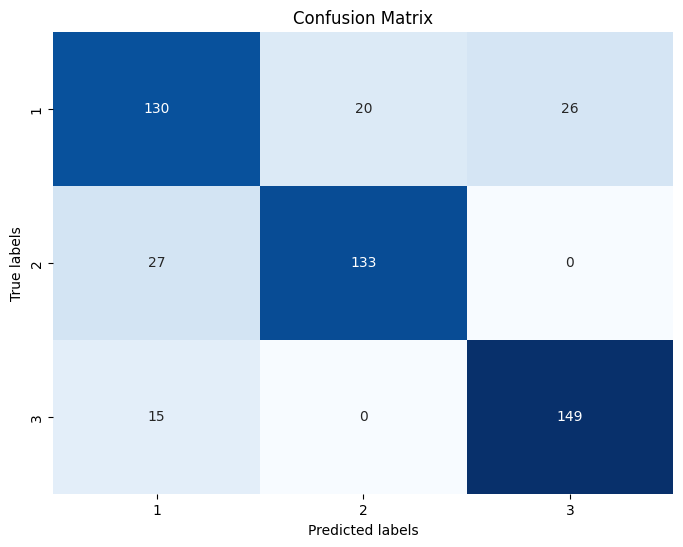

Streaming output truncated to the last 5000 lines.
Learning rate set to 0.5
0:	learn: 0.7106003	total: 2.48ms	remaining: 49.6ms
1:	learn: 0.5386948	total: 7.53ms	remaining: 71.5ms
2:	learn: 0.4461344	total: 13ms	remaining: 77.8ms
3:	learn: 0.3870092	total: 17.5ms	remaining: 74.2ms
4:	learn: 0.3477312	total: 22ms	remaining: 70.3ms
5:	learn: 0.3243264	total: 31ms	remaining: 77.4ms
6:	learn: 0.3044254	total: 34.7ms	remaining: 69.3ms
7:	learn: 0.2944943	total: 40.4ms	remaining: 65.6ms
8:	learn: 0.2844776	total: 64.7ms	remaining: 86.3ms
9:	learn: 0.2775545	total: 73.8ms	remaining: 81.2ms
10:	learn: 0.2701088	total: 84.5ms	remaining: 76.8ms
11:	learn: 0.2583854	total: 98.1ms	remaining: 73.5ms
12:	learn: 0.2477866	total: 111ms	remaining: 68.4ms
13:	learn: 0.2386266	total: 128ms	remaining: 63.8ms
14:	learn: 0.2304097	total: 137ms	remaining: 54.8ms
15:	learn: 0.2238352	total: 142ms	remaining: 44.4ms
16:	learn: 0.2189310	total: 154ms	remaining: 36.3ms
17:	learn: 0.2153303	total: 165ms	remaining:

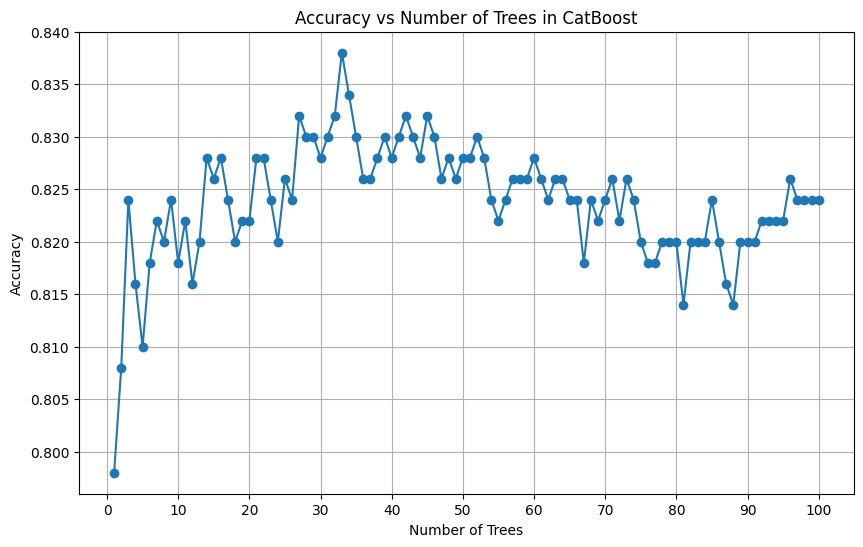

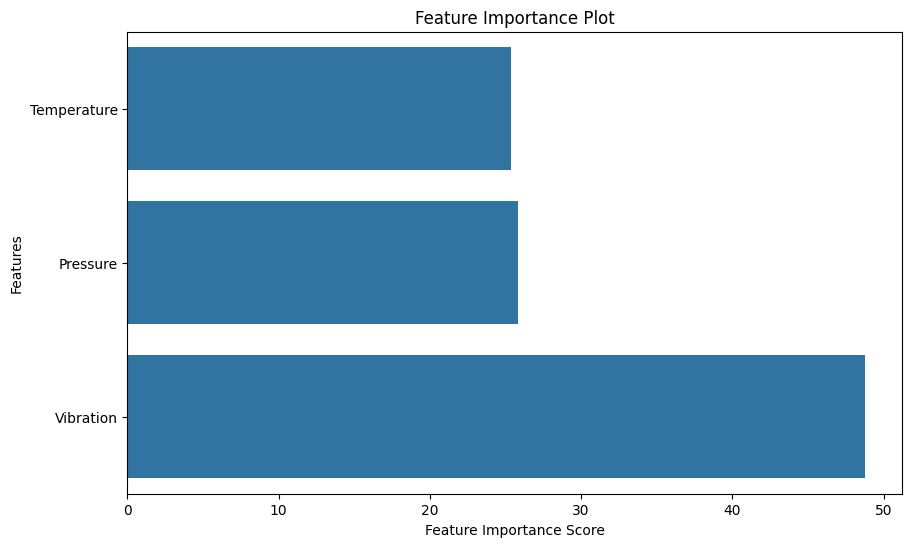

Streaming output truncated to the last 5000 lines.
49:	learn: 0.0366300	total: 58.9ms	remaining: 58.9ms
50:	learn: 0.0358714	total: 59.9ms	remaining: 57.6ms
51:	learn: 0.0347293	total: 61ms	remaining: 56.3ms
52:	learn: 0.0338012	total: 62ms	remaining: 55ms
53:	learn: 0.0335119	total: 63ms	remaining: 53.7ms
54:	learn: 0.0325075	total: 64ms	remaining: 52.4ms
55:	learn: 0.0316776	total: 65ms	remaining: 51.1ms
56:	learn: 0.0306876	total: 66ms	remaining: 49.8ms
57:	learn: 0.0301460	total: 67ms	remaining: 48.6ms
58:	learn: 0.0296732	total: 68.1ms	remaining: 47.3ms
59:	learn: 0.0292762	total: 69.1ms	remaining: 46.1ms
60:	learn: 0.0289116	total: 70.1ms	remaining: 44.8ms
61:	learn: 0.0284472	total: 71.1ms	remaining: 43.6ms
62:	learn: 0.0277212	total: 72.2ms	remaining: 42.4ms
63:	learn: 0.0272949	total: 73.2ms	remaining: 41.2ms
64:	learn: 0.0267377	total: 74.3ms	remaining: 40ms
65:	learn: 0.0264121	total: 75.3ms	remaining: 38.8ms
66:	learn: 0.0258407	total: 76.2ms	remaining: 37.6ms
67:	learn: 0.

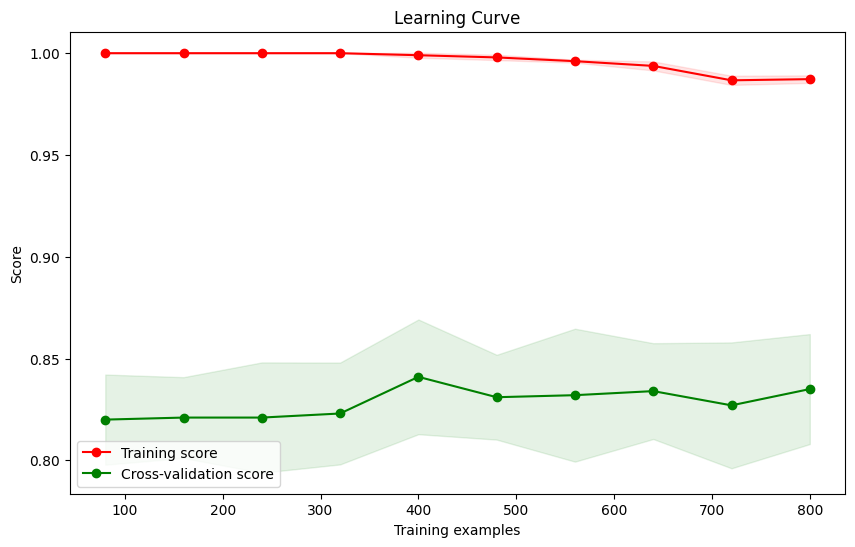

In [ ]:
#Catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('/content/PDM1K.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize CatBoostClassifier
catboost_classifier = CatBoostClassifier(n_estimators=100, random_state=42)
catboost_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print F1 score and recall
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    catboost_classifier = CatBoostClassifier(n_estimators=num_trees, random_state=42)
    catboost_classifier.fit(X_train, y_train)
    y_pred = catboost_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in CatBoost')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

feature_importances = catboost_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    catboost_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


Accuracy: 0.826
              precision    recall  f1-score   support

           1       0.74      0.78      0.76       176
           2       0.89      0.82      0.86       160
           3       0.87      0.87      0.87       164

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



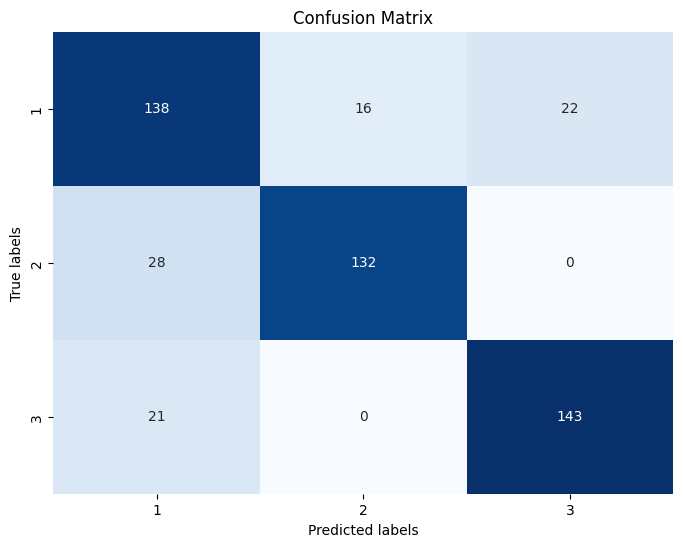

Number of Trees: 1 | Accuracy: 0.776
Number of Trees: 2 | Accuracy: 0.782
Number of Trees: 3 | Accuracy: 0.814
Number of Trees: 4 | Accuracy: 0.792
Number of Trees: 5 | Accuracy: 0.808
Number of Trees: 6 | Accuracy: 0.804
Number of Trees: 7 | Accuracy: 0.802
Number of Trees: 8 | Accuracy: 0.802
Number of Trees: 9 | Accuracy: 0.808
Number of Trees: 10 | Accuracy: 0.812
Number of Trees: 11 | Accuracy: 0.818
Number of Trees: 12 | Accuracy: 0.814
Number of Trees: 13 | Accuracy: 0.822
Number of Trees: 14 | Accuracy: 0.824
Number of Trees: 15 | Accuracy: 0.83
Number of Trees: 16 | Accuracy: 0.824
Number of Trees: 17 | Accuracy: 0.832
Number of Trees: 18 | Accuracy: 0.824
Number of Trees: 19 | Accuracy: 0.83
Number of Trees: 20 | Accuracy: 0.82
Number of Trees: 21 | Accuracy: 0.82
Number of Trees: 22 | Accuracy: 0.826
Number of Trees: 23 | Accuracy: 0.83
Number of Trees: 24 | Accuracy: 0.828
Number of Trees: 25 | Accuracy: 0.83
Number of Trees: 26 | Accuracy: 0.832
Number of Trees: 27 | Accur

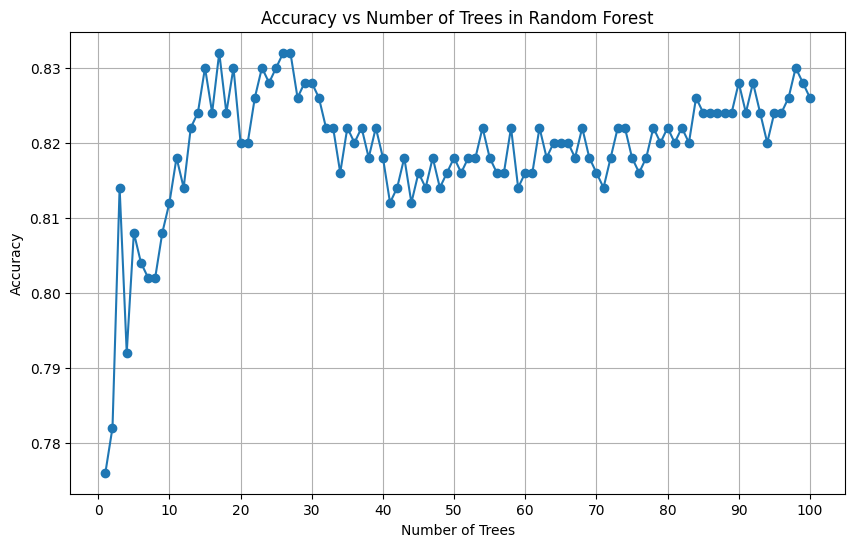

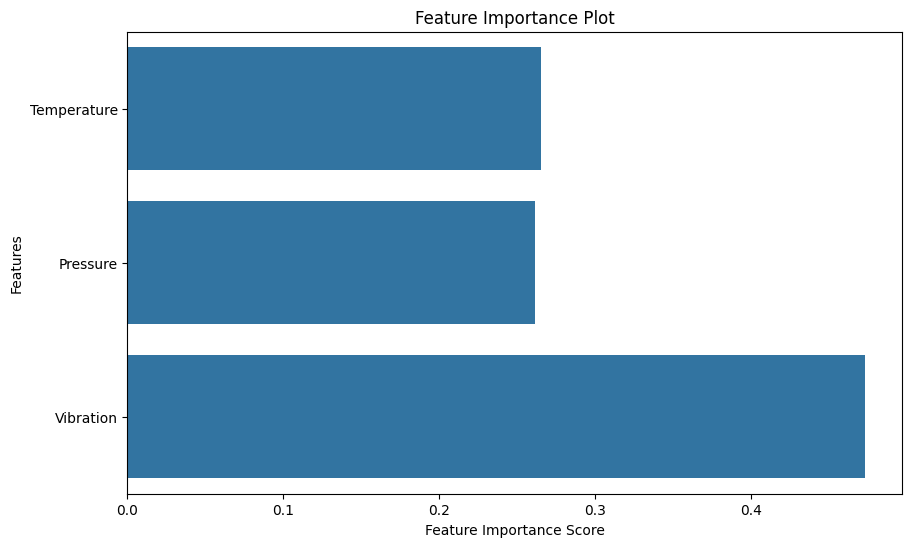

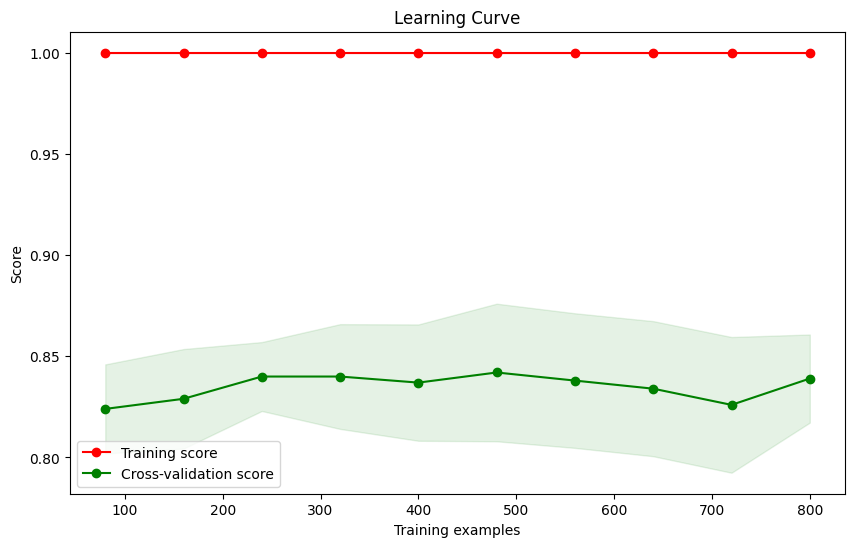

In [ ]:
#Binary class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/PDM1K.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print F1 score and recall
print(class_report)

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs Loss curve (accuracy vs number of trees)
# num_trees_range = range(1, 101)
# accuracies = []

# for num_trees in num_trees_range:
#     rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
#     rf_classifier.fit(X_train, y_train)
#     y_pred = rf_classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)

# plt.figure(figsize=(10, 6))
# plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
# plt.title('Accuracy vs Number of Trees in Random Forest')
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy')
# plt.xticks(np.arange(0, 101, step=10))
# plt.grid(True)
# plt.show()
# Accuracy vs Loss curve (accuracy vs number of trees)
num_trees_range = range(1, 101)
accuracies = []

for num_trees in num_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Number of Trees:", num_trees, "| Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


